## Applying Identity (I), Pauli (X,Y,Z), Hadammard (H) gates in the ground states

In [32]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1) # use 1 qubit
c = ClassicalRegister(1) # 1 classical bit 
qc = QuantumCircuit(q,c)

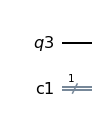

In [33]:
qc.draw('mpl')

In [34]:
from qiskit.quantum_info import Statevector

In [35]:
psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [36]:
from qiskit.visualization import plot_state_qsphere

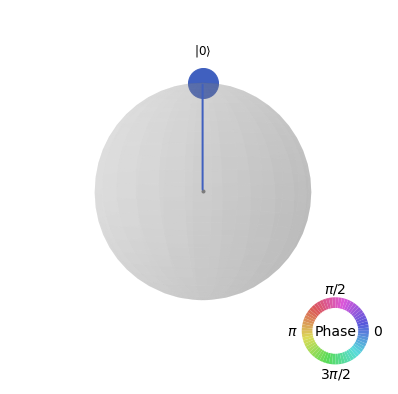

In [37]:
plot_state_qsphere(qc)

In [38]:
from qiskit.quantum_info import DensityMatrix

In [39]:
rho1 = DensityMatrix(qc)
rho1.draw('latex',prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

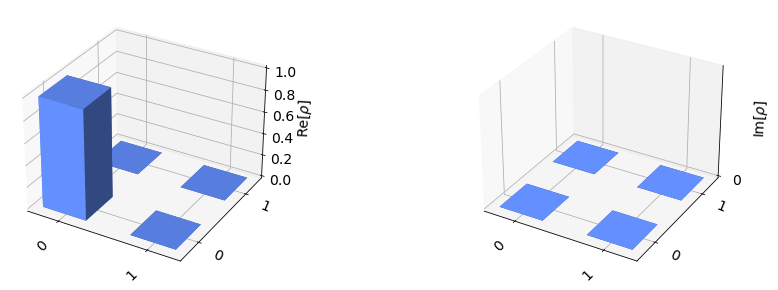

In [40]:
from qiskit.visualization import plot_state_city
plot_state_city(qc)

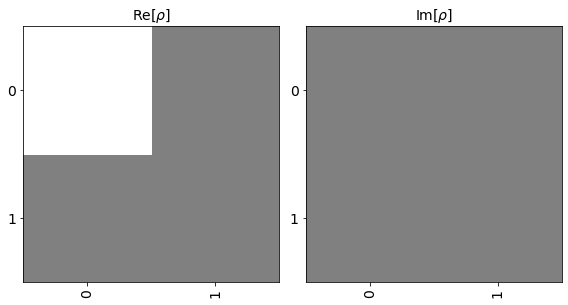

In [41]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(qc)

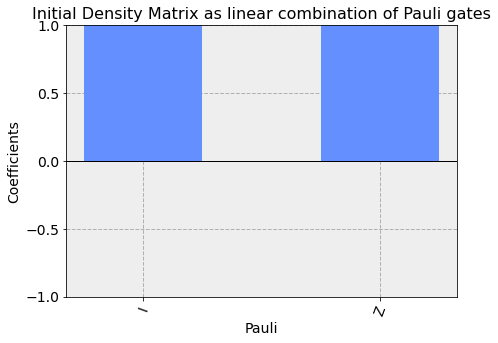

In [42]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(qc,title='Initial Density Matrix as linear combination of Pauli gates')

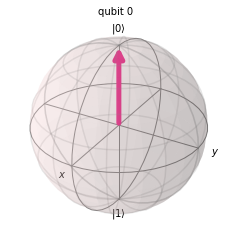

In [43]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

In [44]:
purity = rho1.purity()
print(purity)

(1+0j)


In [45]:
qc.h(q[0]) # apply identity gate i or pauli can be x,y,z or harmmard gate h operate on state 0

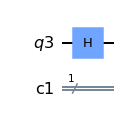

In [46]:
qc.draw('mpl')

In [47]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

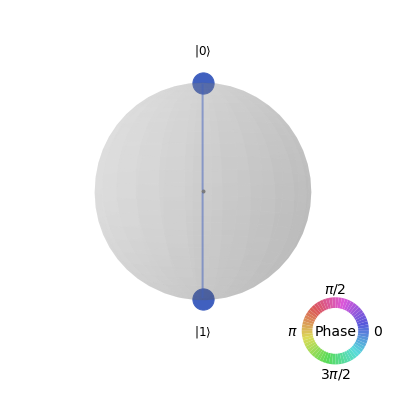

In [48]:
plot_state_qsphere(qc)

In [49]:
rho2 = DensityMatrix(qc) # final density matrix
rho2.draw('latex',prefix='\\rho_2=')

<IPython.core.display.Latex object>

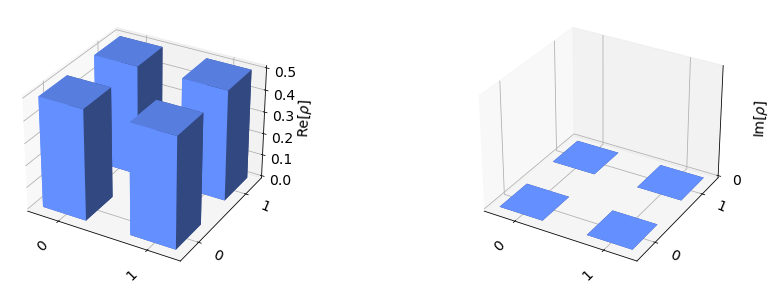

In [50]:
plot_state_city(qc) # final density matrix is actually the same as the initial state 

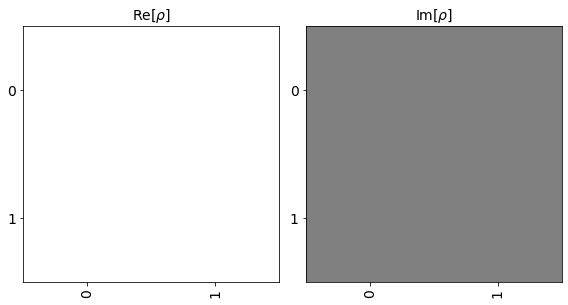

In [51]:
plot_state_hinton(qc)

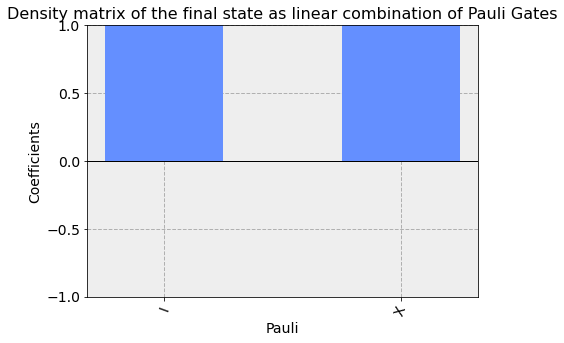

In [52]:
plot_state_paulivec(qc, title = 'Density matrix of the final state as linear combination of Pauli Gates')

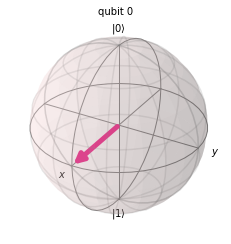

In [53]:
plot_bloch_multivector(qc)

In [54]:
purityf = rho2.purity()
print(purityf)

(0.9999999999999996+0j)


In [55]:
from qiskit.quantum_info import state_fidelity

In [56]:
fidelity = state_fidelity(psi1,psi2)
print(fidelity)

0.4999999999999999


In [57]:
fidelity = state_fidelity(rho1,rho2)
print(fidelity)

0.5000000000000002


In [58]:
qc.measure(q[0],c[0])

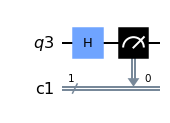

In [59]:
qc.draw('mpl')

In [60]:
from qiskit import transpile # run this circuit on the real quantum compuer without noise & erros 
from qiskit.providers.aer import QasmSimulator # simulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024) # 1024 runnning experiments
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 495, '0': 529}


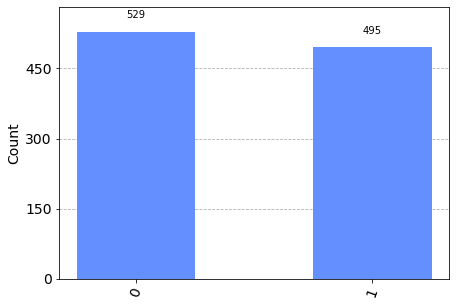

In [61]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)